In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
ColumnNames = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]
types = {1:"buildingwindowsfloatprocessed", 2:"buildingwindowsnonfloatprocessed", 3:"vehiclewindowsfloatprocessed", 4:"vehiclewindowsnonfloatprocessed", 5:"containers", 6:"tableware", 7:"headlamps"}
types

{1: 'buildingwindowsfloatprocessed',
 2: 'buildingwindowsnonfloatprocessed',
 3: 'vehiclewindowsfloatprocessed',
 4: 'vehiclewindowsnonfloatprocessed',
 5: 'containers',
 6: 'tableware',
 7: 'headlamps'}

In [3]:
dataset = pd.read_csv('glass.csv',names = ColumnNames, header = 0)
dataset.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


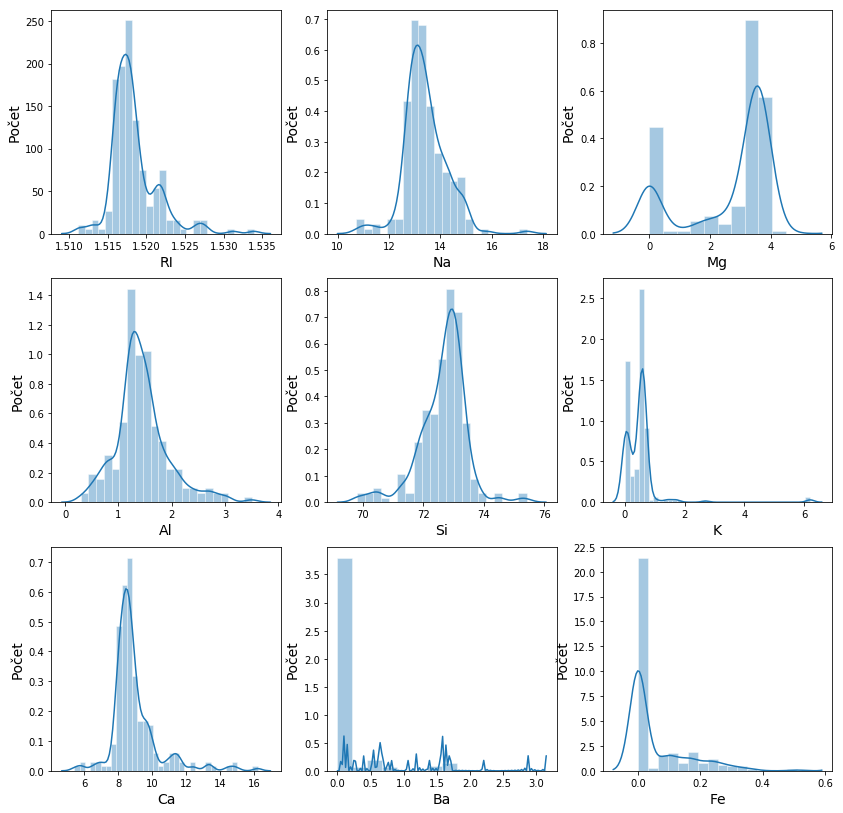

In [4]:
df = dataset.drop("Type", axis=1)
y = dataset["Type"]

f, axes = plt.subplots(3,3,figsize=(14,14))
sns.set_style('darkgrid')
sns.distplot(dataset['RI'], ax = axes[0,0])
axes[0,0].set_xlabel('RI', fontsize=14)
axes[0,0].set_ylabel('Počet', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.distplot(dataset['Na'], ax = axes[0,1])
axes[0,1].set_xlabel('Na', fontsize=14)
axes[0,1].set_ylabel('Počet', fontsize=14)
axes[0,1].yaxis.tick_left()

sns.distplot(dataset['Mg'], ax = axes[0,2])
axes[0,2].set_xlabel('Mg', fontsize=14)
axes[0,2].set_ylabel('Počet', fontsize=14)
axes[0,2].yaxis.tick_left()

sns.distplot(dataset['Al'], ax = axes[1,0])
axes[1,0].set_xlabel('Al', fontsize=14)
axes[1,0].set_ylabel('Počet', fontsize=14)
axes[1,0].yaxis.tick_left()

sns.distplot(dataset['Si'], ax = axes[1,1])
axes[1,1].set_xlabel('Si', fontsize=14)
axes[1,1].set_ylabel('Počet', fontsize=14)
axes[1,1].yaxis.tick_left()

sns.distplot(dataset['K'], ax = axes[1,2])
axes[1,2].set_xlabel('K', fontsize=14)
axes[1,2].set_ylabel('Počet', fontsize=14)
axes[1,2].yaxis.tick_left()

sns.distplot(dataset['Ca'], ax = axes[2,0])
axes[2,0].set_xlabel('Ca', fontsize=14)
axes[2,0].set_ylabel('Počet', fontsize=14)
axes[2,0].yaxis.tick_left()

sns.distplot(dataset['Ba'], ax = axes[2,1])
axes[2,1].set_xlabel('Ba', fontsize=14)
axes[2,1].set_ylabel('Počet', fontsize=14)
axes[2,1].yaxis.tick_left()

sns.distplot(dataset['Fe'], ax = axes[2,2])
axes[2,2].set_xlabel('Fe', fontsize=14)
axes[2,2].set_ylabel('Počet', fontsize=14)
axes[2,2].yaxis.tick_left()

plt.show()

In [5]:
df = df.sample(frac=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
85,1.51625,13.36,3.58,1.49,72.72,0.45,8.21,0.00,0.00
115,1.51846,13.41,3.89,1.33,72.38,0.51,8.28,0.00,0.00
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.00,0.00
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00
97,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.00,0.24
101,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.00,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16


In [6]:
kategoricka_premenna = np_utils.to_categorical(y)

In [7]:
model = Sequential()
model.add(Dense(9, input_dim=9, activation = 'sigmoid'))
model.add(Dense(9, activation = 'sigmoid'))
model.add(Dense(8))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.fit(df, kategoricka_premenna)
scores = model.evaluate(df, kategoricka_premenna)

Epoch 1/1
214/214 [==============================] - 0s 739us/step


In [8]:
print("\nPresnosť siete: %.2f%%" %(scores[1]*100))


Presnosť siete: 4.21%
